In [12]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [13]:
data=pd.read_csv('AirPassengers.csv')

In [14]:
data.head()

,Month,#Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
data=data.set_index("Month")
data.head()

,#Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualizing the time series

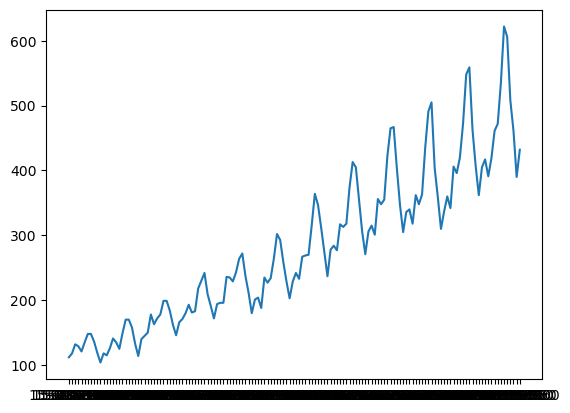

In [17]:
plt.plot(data)
plt.show()

# Check for Staionarity

Method 1: Rolling Statistics

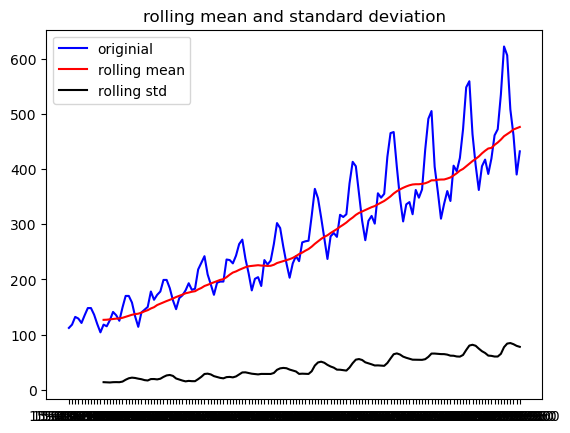

In [18]:
#Determining rolling statistics
rolmean= data.rolling(window=12).mean()
rolstd= data.rolling(window=12).std()

#Plot rolling statistics
orig= plt.plot(data, color="blue", label="originial")
mean= plt.plot(rolmean, color="red", label="rolling mean")
std= plt.plot(rolstd, color="black", label="rolling std")
plt.title("rolling mean and standard deviation")
plt.legend()
plt.show()

Method 2: ADF Test

In [19]:
# ADF Test - null hypothesis - non stationary - if p value< 5% reject null hpothesis

from statsmodels.tsa.stattools import adfuller
adfuller_result= adfuller(data["#Passengers"].values)
adfuller_result

(0.8153688792060497,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:
print("p-value: {}".format(adfuller_result[1]))

p-value: 0.991880243437641


The time seriesis not stationary

# Stationarize the time series

In [21]:
#Transformation
ts_log= np.log(data["#Passengers"])

#Get the difference bw moving avg and actual number of passangers
ts_log_mv_diff= ts_log - ts_log.shift(2)
ts_log_mv_diff.head(15)

Month
15-01-1949         NaN
15-02-1949         NaN
15-03-1949    0.164303
15-04-1949    0.089128
15-05-1949   -0.087011
15-06-1949    0.045462
15-07-1949    0.201422
15-08-1949    0.091937
15-09-1949   -0.084557
15-10-1949   -0.218089
15-11-1949   -0.268264
15-12-1949   -0.008439
15-01-1950    0.100541
15-02-1950    0.065597
15-03-1950    0.203828
Name: #Passengers, dtype: float64

In [22]:
#Remove Nan values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head()

Month
15-03-1949    0.164303
15-04-1949    0.089128
15-05-1949   -0.087011
15-06-1949    0.045462
15-07-1949    0.201422
Name: #Passengers, dtype: float64

# Check for Stationarity

Method 1: Rolling Statistics

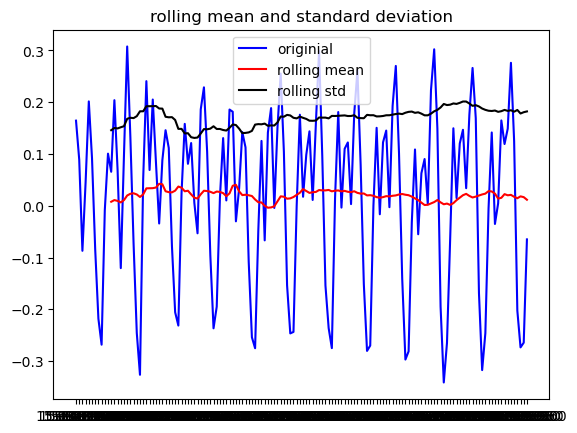

In [23]:
#Determining rolling statistics
rolmean= ts_log_mv_diff.rolling(window=12).mean()
rolstd= ts_log_mv_diff.rolling(window=12).std()

#Plot rolling statistics
orig= plt.plot(ts_log_mv_diff, color="blue", label="originial")
mean= plt.plot(rolmean, color="red", label="rolling mean")
std= plt.plot(rolstd, color="black", label="rolling std")
plt.title("rolling mean and standard deviation")
plt.legend()
plt.show()

Method 2: ADF Test

In [26]:
adfuller_result= adfuller(ts_log_mv_diff)
adfuller_result[1]

0.02191911456403848

Now, the time series is stationary

# Plot ACF/PACF and find p,d,q parameters

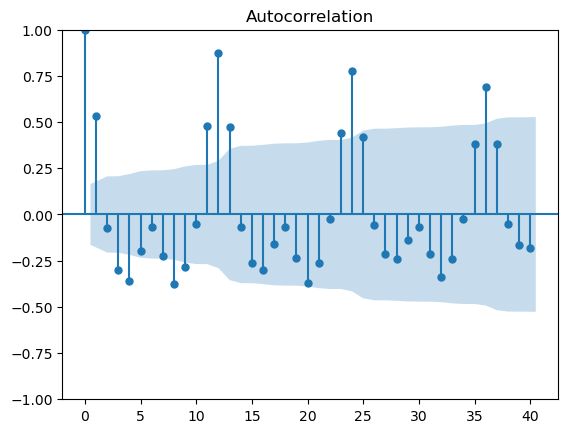

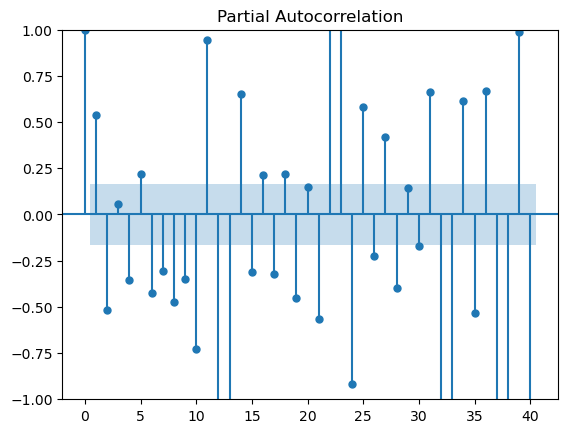

In [27]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
fig= sm.graphics.tsa.plot_acf(ts_log_mv_diff, lags=40)
fig= sm.graphics.tsa.plot_pacf(ts_log_mv_diff, lags=40)

From ACF curve, optimal values of q in the ARIMA model must be 1.

From PACF curve, optimal values of p in the ARIMA model 1.

# Build the ARIMA model

C:\Users\ADMIN\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


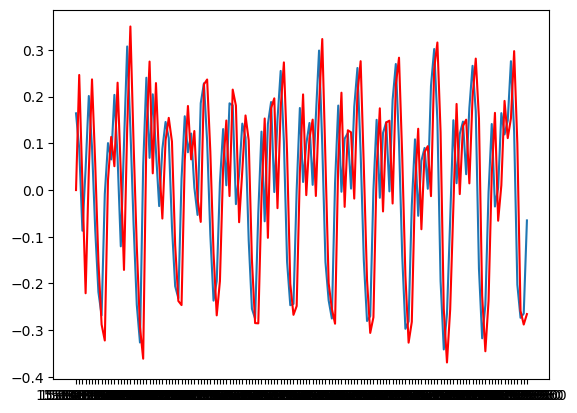

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(ts_log_mv_diff, order=(1,2,1))
results_ARIMA= model.fit()
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.show()